# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [3]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [4]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [5]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [6]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Ученая степень', 'Среднее специальное', 'Среднее', 'Неоконченное высшее', 'Неполное среднее', 'Два и более высших образования'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Разведен(а)', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Транспорт', 'Информационные технологии', 'Развлечения/Искусство', 'Металлургия/Промышленность/Машиностроение', 'Юридические услуги/нотариальные услуги', 'Недвижимость', 'Сборочные производства', 'Образование', 'Коммунальное хоз-во/Дорожные службы', 'Банк/Финансы', 'Логистика', 'Маркетинг', 'ЧОП/Детективная д-ть', 'Туризм', 'Химия/Парфюмерия/Фармацевтика', 'Страхование', 'Торговля', 'Сельское хозяйство', 'Управляющая компания', 'Энергетика', 'Другие сферы', 'Информационные услуги', 'Наука', 'Ресторанный бизнес/Общественное питание', 'Нефтегазовая промышленность', 'Подбор персонала', 'СМИ/Реклама/PR-агенства', 'Строительство', 'Государственная служба', 'Здравоохранение', 'Салоны красоты и здоровья'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [ ]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
# да есть пропуски в данных. надо их чем-то значимым заполнить. 
# то есть текстовые поля типа GEN_INDUSTRY, GEN_TITLE и т.д. - в них проставить вместо nan что то типа "no value"
# в поле WORK_TIME мы заменим nan на медиану
# а в поле PREVIOUS_CARD_NUM_UTILIZED мы заменим nan на 0
# заменить пропуски надо так как обрабатывать строки с пропусками наши черные ящики не умеют

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [15]:
# Категориальных признаков масса - их надо перекодировать при помощи pd.get_dummies

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [37]:
def preproc_data(df_input):
    df_output = df_input.copy()

    ## Your Code Here
    # Удаляем идентификатор `AGREEMENT_RK`
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1) 
    # удаляем точки в столбцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
    # и приводим к типу float
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # теперь заполняем пропуски
    df_output['GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].fillna('no value') 
    df_output['GEN_TITLE'] = df_output['GEN_TITLE'].fillna('no value')
    df_output['ORG_TP_STATE'] = df_output['ORG_TP_STATE'].fillna('no value')
    df_output['ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].fillna('no value')
    df_output['JOB_DIR'] = df_output['JOB_DIR'].fillna('no value')
    df_output['TP_PROVINCE'] = df_output['TP_PROVINCE'].fillna('no value')
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].median())
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    
    # а теперь кодируем категориальные признаки все одним get_dummies
    df_output = pd.get_dummies(df_output)
    
    return df_output

In [42]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample_train == 1').drop(['sample_train', 'sample_test'], axis=1)
df_test_preproc = df_preproc.query('sample_test == 1').drop(['sample_train', 'sample_test'], axis=1)

In [46]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 449 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(411)
memory usage: 10.5 MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [48]:
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [50]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
dtc = DecisionTreeClassifier()
dtc.fit(xTrain,yTrain)
predict_dtc = dtc.predict(xTest)
predict_proba_dtc = dtc.predict_proba(xTest)

rfc = RandomForestClassifier()
rfc.fit(xTrain,yTrain)
predict_rfc = rfc.predict(xTest)
predict_proba_rfc = rfc.predict_proba(xTest)

lr = LogisticRegression()
lr.fit(xTrain,yTrain)
predict_lr = lr.predict(xTest)
predict_proba_lr = lr.predict_proba(xTest)

In [67]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Your Code Here
print('precision dtc', precision_score(yTest, predict_dtc))
print('recall dtc', recall_score(yTest, predict_dtc))
print('accuracy dtc', accuracy_score(yTest, predict_dtc))
print('f1 dtc', f1_score(yTest, predict_dtc))    
print('')
print('precision rfc', precision_score(yTest, predict_rfc))
print('recall rfc', recall_score(yTest, predict_rfc))
print('accuracy rfc', accuracy_score(yTest, predict_rfc))
print('f1 rfc', f1_score(yTest, predict_rfc))    
print('')
print('precision lr', precision_score(yTest, predict_lr))
print('recall lr', recall_score(yTest, predict_lr))
print('accuracy lr', accuracy_score(yTest, predict_lr))
print('f1 lr', f1_score(yTest, predict_lr))    


precision dtc 0.16635514018691588
recall dtc 0.16036036036036036
accuracy dtc 0.8003065469673747
f1 dtc 0.16330275229357796

precision rfc 0.26666666666666666
recall rfc 0.007207207207207207
accuracy rfc 0.8769432888110357
f1 rfc 0.014035087719298246

precision lr 0.3333333333333333
recall lr 0.0036036036036036037
accuracy lr 0.8780380994088023
f1 lr 0.0071301247771836


In [83]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here


(-0.01, 1.01)

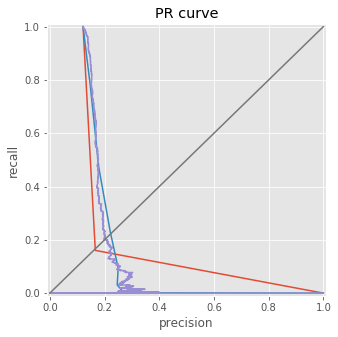

In [105]:
from sklearn.metrics import precision_recall_curve

precision_dtc, recall_dtc, thresholds_dts = precision_recall_curve(yTest, predict_proba_dtc[:,1])

precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(yTest, predict_proba_rfc[:,1])

precision_lr, recall_lr, thresholds_lr = precision_recall_curve(yTest, predict_proba_lr[:,1])

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(precision_dtc, recall_dtc)
plt.plot(precision_rfc, recall_rfc)
plt.plot(precision_lr, recall_lr)
plt.plot([0, 1], [0, 1])
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [106]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

## Your Code Here


(-0.01, 1.01)

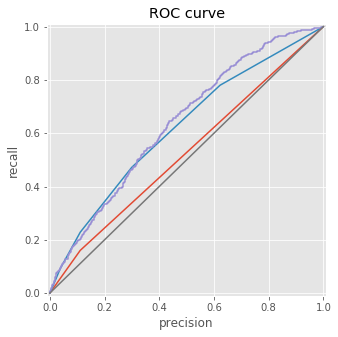

In [107]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_dtc, tpr_dtc, thresholds_dts = roc_curve(yTest, predict_proba_dtc[:,1])
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(yTest, predict_proba_rfc[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(yTest, predict_proba_lr[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1])
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [108]:
roc_auc_score(yTest, predict_proba_dtc[:,1])

0.5245969299309279

In [109]:
roc_auc_score(yTest, predict_proba_rfc[:,1])

0.6176760259761258

In [110]:
roc_auc_score(yTest, predict_proba_lr[:,1])

0.6371269075655915

In [117]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

dtc = DecisionTreeClassifier()
dtc_cross_val_score = cross_val_score(
    dtc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
dtc_cross_val_score.mean()

0.5342712441148472

In [118]:
rfc = RandomForestClassifier()
rfc_cross_val_score = cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
rfc_cross_val_score.mean()

0.5914150650290626

In [120]:
lr = LogisticRegression()
lr_cross_val_score = cross_val_score(
    lr,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
lr_cross_val_score.mean()

0.6382441763130824

In [138]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here
lr_test = LogisticRegression()
lr_test.fit(X,y)
# посчитаю и predict и predict_proba
predict_lr_test = lr_test.predict(X_test)
predict_proba_lr_test = lr_test.predict_proba(X_test)

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [139]:
# посчитаем метрики хоть нас и не просили
print('precision lr', precision_score(y_test, predict_lr_test))
print('recall lr', recall_score(y_test, predict_lr_test))
print('accuracy lr', accuracy_score(y_test, predict_lr_test))
print('f1 lr', f1_score(y_test, predict_lr_test))    



precision lr 0.25
recall lr 0.002857142857142857
accuracy lr 0.8819584171696848
f1 lr 0.005649717514124295


(-0.01, 1.01)

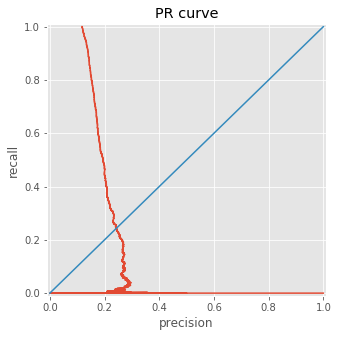

In [140]:
precision_lr_test, recall_lr_test, thresholds_lr_test = precision_recall_curve(y_test, predict_proba_lr_test[:,1])

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(precision_lr_test, recall_lr_test)
plt.plot([0, 1], [0, 1])
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

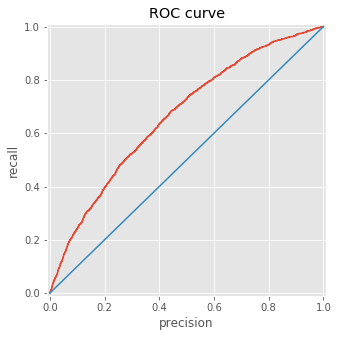

In [141]:
# ROC curve
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_lr_test, tpr_lr_test, thresholds_lr = roc_curve(y_test, predict_proba_lr_test[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr_lr_test, tpr_lr_test)
plt.plot([0, 1], [0, 1])
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [142]:
# Померить roc_auc на тесте
roc_auc_score(y_test, predict_proba_lr_test[:,1])

0.6637952670429874